In [11]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
df = pd.read_parquet("open/train/채널정보_with_segment.parquet")

# 생략 없이 모든 값 출력 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 2. 범주형 → 수치형으로 변환
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 3. Segment를 수치형으로 변환 (혹시 문자일 수도 있으므로)
if df["Segment"].dtype == 'object' or df["Segment"].dtype.name == 'category':
    df["Segment"] = LabelEncoder().fit_transform(df["Segment"].astype(str))

# 4. 수치형 컬럼 리스트 (Segment 제외)
numeric_cols = df.select_dtypes(include="number").columns.drop("Segment")

# 5. 각 컬럼에서 해당 컬럼의 결측치만 제거하고 Segment와 상관계수 계산
corr_dict = {}
for col in numeric_cols:
    valid_idx = df[col].notna()
    if valid_idx.sum() >= 2:
        corr_val = df.loc[valid_idx, col].corr(df.loc[valid_idx, "Segment"])
        corr_dict[col] = corr_val

# 6. 결과 정리
segment_corr1 = pd.Series(corr_dict).sort_values(ascending=False)

# 7. 출력
print("📊 Segment와의 상관계수 (각 변수 결측치 제거 기준):")
print(segment_corr1)


C:\Users\user\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\user\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📊 Segment와의 상관계수 (각 변수 결측치 제거 기준):
OS구분코드               2.091197e-01
방문후경과월_PC_R6M        1.727725e-01
방문후경과월_앱_R6M         1.582020e-01
인입후경과월_IB_R6M        1.210675e-01
인입횟수_ARS_R6M         1.092171e-01
이용메뉴건수_ARS_R6M       4.280860e-02
방문후경과월_모바일웹_R6M      4.036693e-02
방문일수_PC_R6M          3.259817e-02
IB문의건수_CS_R6M        1.310804e-02
IB문의건수_SMS_R6M       1.114800e-02
IB문의건수_결제일변경_R6M     6.406865e-03
IB문의건수_CS_B0M        5.609715e-03
IB문의건수_비밀번호_R6M      3.630396e-03
IB문의건수_CL_RV_B0M     2.826569e-03
IB문의건수_부대서비스_R6M     1.492490e-03
ID                   1.218077e-03
IB문의건수_카드발급_B0M      6.674592e-04
IB문의건수_CL_RV_R6M     5.031004e-04
기준년월                 8.217349e-19
방문횟수_모바일웹_B0M       -1.307926e-03
방문일수_모바일웹_B0M       -1.357663e-03
IB문의건수_사용승인내역_B0M   -6.124198e-03
IB문의건수_할부_R6M       -7.621241e-03
IB문의건수_포인트_R6M      -8.312594e-03
IB문의건수_BL_R6M       -1.035452e-02
IB문의건수_CA_R6M       -1.708173e-02
IB문의건수_한도_R6M       -1.863886e-02
IB문의건수_정보변경_R6M     -2.125025e-02
IB문의건수_결제_R6M

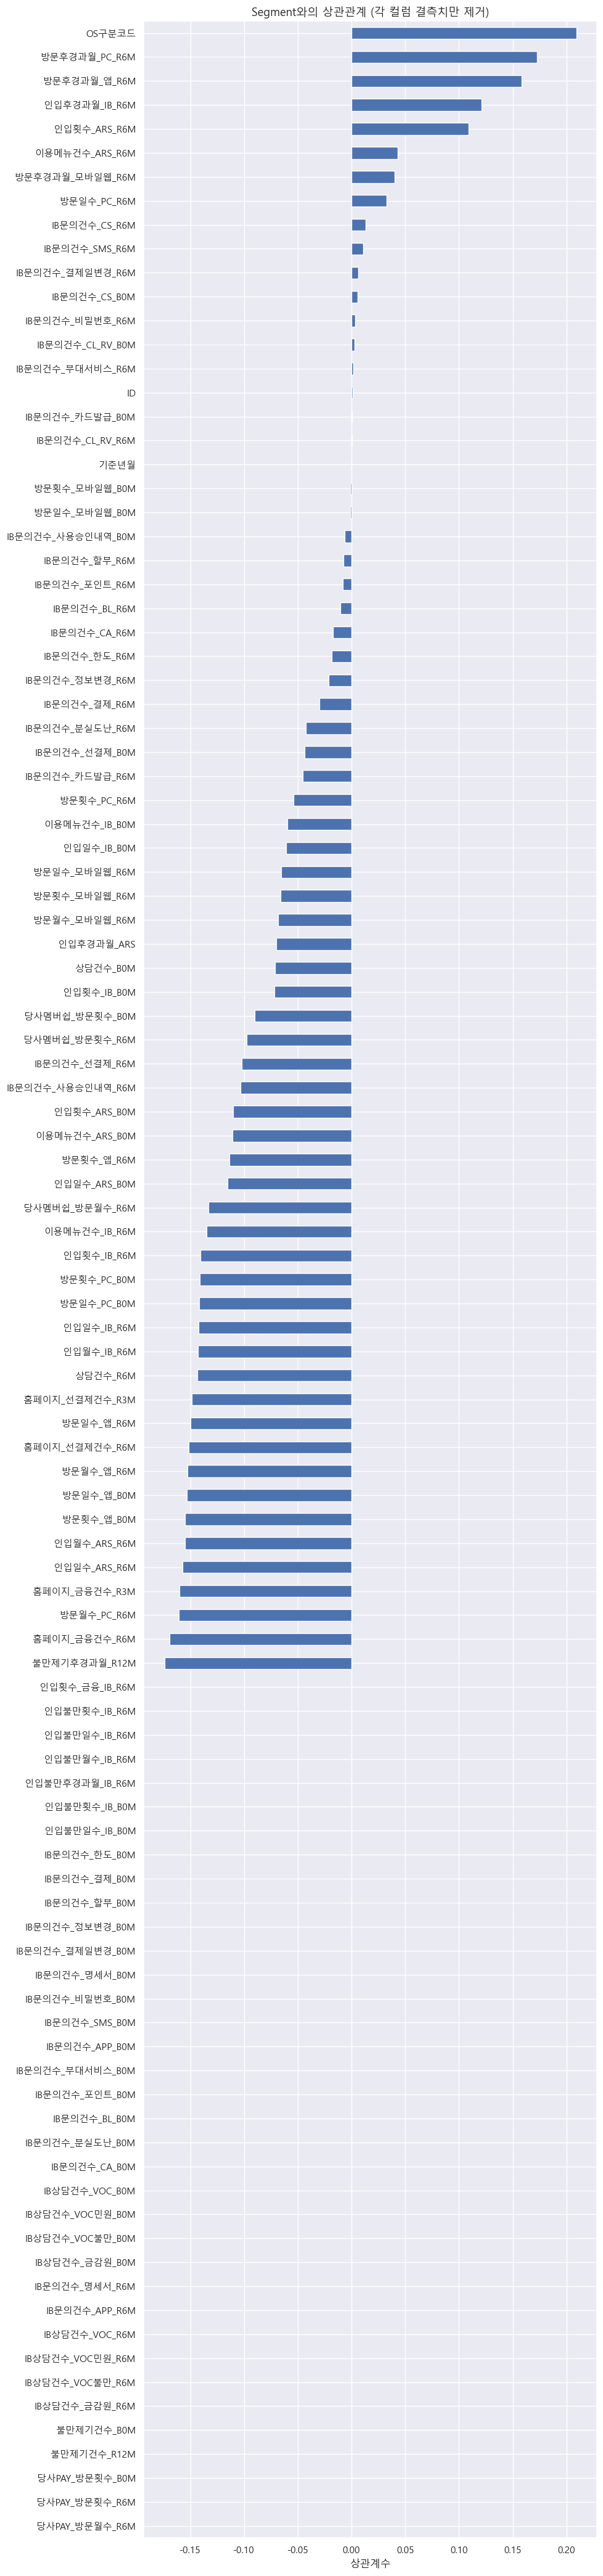

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, len(segment_corr1) * 0.4))
segment_corr1.plot(kind='barh')
plt.title("Segment와의 상관관계 (각 컬럼 결측치만 제거)", fontsize=13)
plt.xlabel("상관계수")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


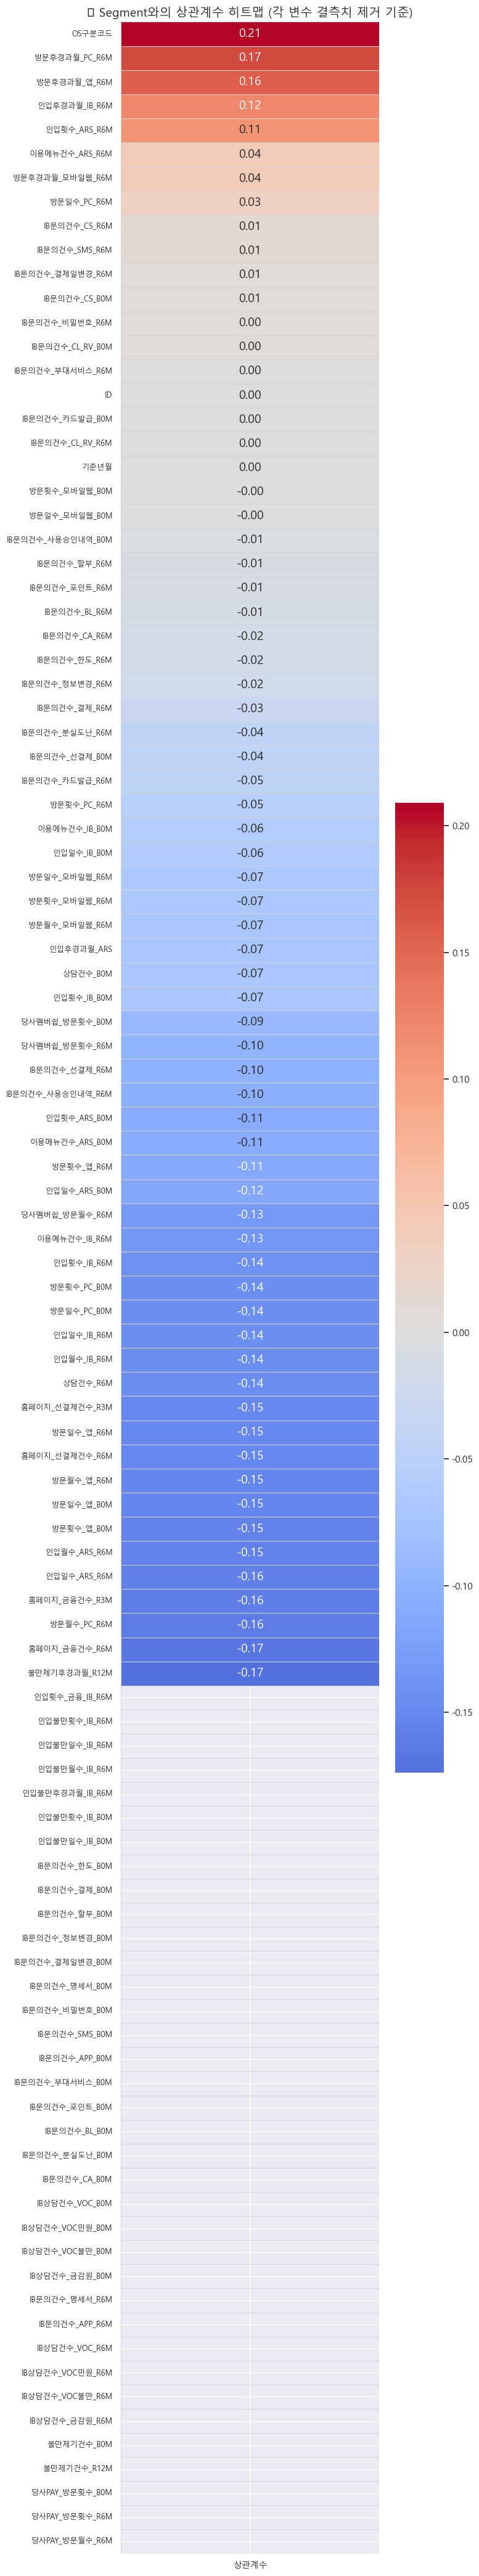

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(8, len(segment_corr1) * 0.4))
sns.heatmap(
    segment_corr1.to_frame(name="상관계수"),
    annot=True, fmt=".2f", cmap="coolwarm", center=0,
    linewidths=0.5, linecolor="lightgray",
    cbar_kws={"shrink": 0.8}
)

plt.title("📊 Segment와의 상관계수 히트맵 (각 변수 결측치 제거 기준)", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.show()


In [20]:
# 상관계수 Series가 corr_with_segment 라고 가정
# 절댓값이 0.3 이상인 컬럼만 추출
selected_features = segment_corr1[abs(segment_corr1) >= 0.3].index.tolist()

# Segment 컬럼도 포함해서 저장할 컬럼 리스트 만들기
cols_to_save = selected_features + ['Segment']

# 해당 컬럼들만 포함된 데이터프레임 만들기
filtered_df = df[cols_to_save]

# CSV로 저장
filtered_df.to_csv("06.채널정보_컬럼선택.csv", index=False, encoding="utf-8-sig")


In [1]:
import pandas as pd
from IPython.display import display

# 1. 합쳐진 파일 불러오기
df = pd.read_parquet("open/train/채널정보_with_segment.parquet")

# 2. Segment 컬럼 자동 탐색 및 숫자형 변환
segment_col_candidates = [col for col in df.columns if 'segment' in col.lower()]
print("사용 가능한 Segment 컬럼 후보:", segment_col_candidates)
segment_col = segment_col_candidates[-1]

if df[segment_col].dtype == 'object':
    df[segment_col] = df[segment_col].astype('category').cat.codes

# 3. 숫자형 컬럼만 추출 (Segment 제외)
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != segment_col]

# 4. 결측치 제거 및 std=0 컬럼 제거
clean_df = df[numeric_cols + [segment_col]].dropna()
clean_df = clean_df.loc[:, clean_df.std() != 0]
numeric_cols = [col for col in numeric_cols if col in clean_df.columns]

# 5. 결측치 수 계산
missing_dict = {
    col: df[col].isnull().sum()
    for col in numeric_cols
}

# 6. 이상치 수 계산 (IQR 기준)
outlier_dict = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_dict[col] = outliers

# 7. 상관계수 계산 (Segment 기준)
corr_dict = {
    col: clean_df[segment_col].corr(clean_df[col])
    for col in numeric_cols
}

# 8. 결과 정리
corr_df = pd.DataFrame({
    '컬럼명': list(corr_dict.keys()),
    '상관계수': list(corr_dict.values()),
    '결측치 수': [missing_dict[col] for col in corr_dict.keys()],
    '이상치 수': [outlier_dict[col] for col in corr_dict.keys()]
})

corr_df = corr_df.sort_values(by='상관계수', key=abs, ascending=False)

# 9. 시각화 출력
styled = corr_df.style.background_gradient(cmap='coolwarm', subset=['상관계수']) \
                    .set_properties(**{'text-align': 'center'}) \
                    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(styled)


사용 가능한 Segment 컬럼 후보: ['Segment']


,컬럼명,상관계수,결측치 수,이상치 수
54,불만제기후경과월_R12M,-0.173899,0,0
8,방문후경과월_PC_R6M,0.172772,0,307431
58,홈페이지_금융건수_R6M,-0.169264,0,300865
7,방문월수_PC_R6M,-0.160520,0,335069
60,홈페이지_금융건수_R3M,-0.160280,0,266568
11,방문후경과월_앱_R6M,0.158202,0,534003
1,인입일수_ARS_R6M,-0.156965,0,249301
2,인입월수_ARS_R6M,-0.154813,0,84069
18,방문횟수_앱_B0M,-0.154793,0,429286
19,방문일수_앱_B0M,-0.152878,0,428948
